In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, plot_roc_curve

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/BasiaSDA/projekt-klasyfikacja/main/df1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/BasiaSDA/projekt-klasyfikacja/main/df2.csv')
df=df1.merge(df2)

In [3]:
df.drop(['Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace = True)
df = df[(df['TotalWorkingYears']<60) & (df['Age']<80) & (df['DistanceFromHome']<100) & (df['YearsAtCompany']<60) & (df['YearsInCurrentRole']<60) & (df['YearsSinceLastPromotion']<60) & (df['YearsWithCurrManager']<60)]
df = df.dropna()
df = df.reset_index(drop=True)
df = df.iloc[:, 1:].drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1755 non-null   float64
 1   BusinessTravel            1755 non-null   object 
 2   DailyRate                 1755 non-null   float64
 3   Department                1755 non-null   object 
 4   DistanceFromHome          1755 non-null   float64
 5   Education                 1755 non-null   float64
 6   EducationField            1755 non-null   object 
 7   EnvironmentSatisfaction   1755 non-null   float64
 8   Gender                    1755 non-null   object 
 9   HourlyRate                1755 non-null   float64
 10  JobInvolvement            1755 non-null   float64
 11  JobLevel                  1755 non-null   float64
 12  JobRole                   1755 non-null   object 
 13  JobSatisfaction           1755 non-null   float64
 14  MaritalS

WYCZYSZCZONE DANE

In [4]:
df_copy = df[['Age', 'DistanceFromHome', 'EducationField',  'EnvironmentSatisfaction', 'JobInvolvement',  'JobLevel', 
                  'JobSatisfaction','MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'StockOptionLevel',
                 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Attrition']]
df_copy = pd.get_dummies(df_copy, columns = ['EducationField', 'OverTime', 'Attrition'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1755 non-null   float64
 1   DistanceFromHome                 1755 non-null   float64
 2   EnvironmentSatisfaction          1755 non-null   float64
 3   JobInvolvement                   1755 non-null   float64
 4   JobLevel                         1755 non-null   float64
 5   JobSatisfaction                  1755 non-null   float64
 6   MonthlyIncome                    1755 non-null   float64
 7   NumCompaniesWorked               1755 non-null   float64
 8   PercentSalaryHike                1755 non-null   float64
 9   StockOptionLevel                 1755 non-null   float64
 10  YearsAtCompany                   1755 non-null   float64
 11  YearsInCurrentRole               1755 non-null   float64
 12  YearsWithCurrManager

In [5]:
# Utworzenie zbioru testowego i treningowego
y = df_copy['Attrition_Yes'].values
df_copy1=df_copy.drop(['Attrition_Yes','Attrition_No'], axis=1)
X = df_copy1.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [6]:
def calculate_metrics (X_train, X_test, y_train, y_test, model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    F1_train = f1_score(y_train, y_pred_train)
    F1_test = f1_score(y_test, y_pred_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    wyniki = pd.DataFrame({'Accuracy':[acc_train, acc_test],
                      'F1':[F1_train, F1_test],
                      'Recall':[recall_train, recall_test]})
    wyniki.index=['train', 'test']
    return  wyniki

       Accuracy        F1    Recall
train  0.673789  0.041841  0.021598
test   0.666667  0.048780  0.025000
       Accuracy        F1    Recall
train  0.825499  0.653465  0.498920
test   0.455840  0.194093  0.191667
       Accuracy        F1    Recall
train  0.695157  0.372434  0.274298
test   0.555556  0.161290  0.125000
       Accuracy   F1  Recall
train  0.670228  0.0     0.0
test   0.658120  0.0     0.0


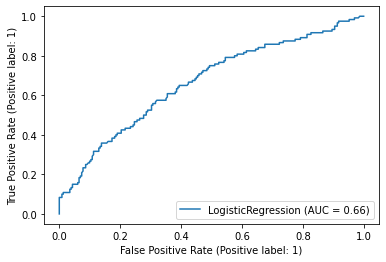

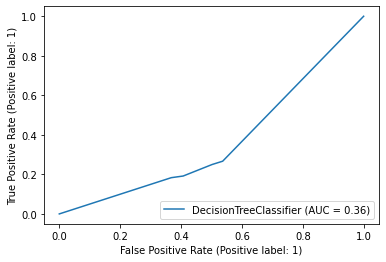

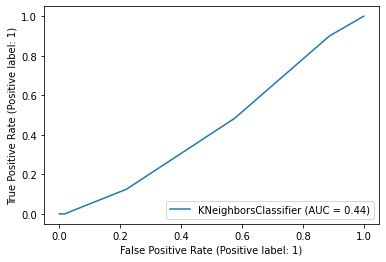

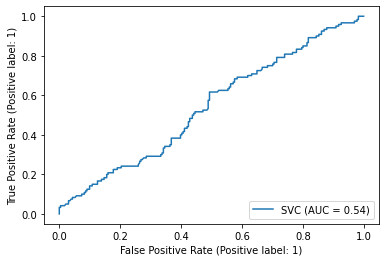

In [7]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

       Accuracy        F1    Recall
train  0.677077  0.118971  0.065603
test   0.689655  0.100000  0.052632
       Accuracy       F1    Recall
train  0.783736  0.53129  0.368794
test   0.482759  0.06250  0.052632
       Accuracy        F1    Recall
train  0.694755  0.314815  0.210993
test   0.534483  0.000000  0.000000
       Accuracy   F1  Recall
train  0.667649  0.0     0.0
test   0.672414  0.0     0.0
       Accuracy        F1    Recall
train  0.710666  0.263868  0.156028
test   0.637931  0.086957  0.052632


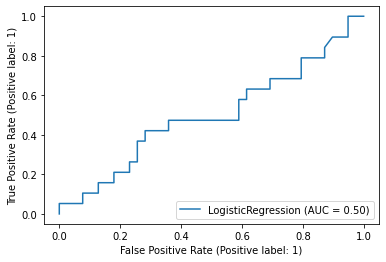

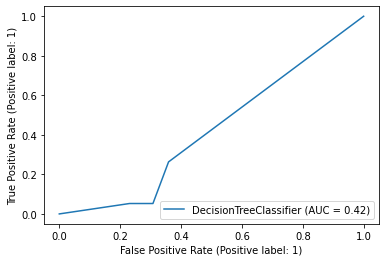

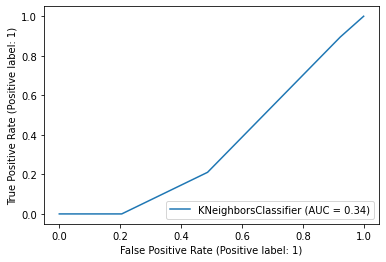

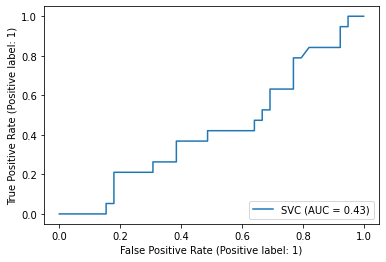

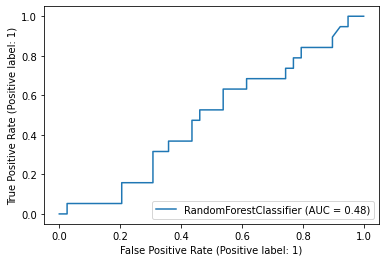

In [8]:
# Kroswalidacja stratyfikowana
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

In [9]:
# K-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_copy['Attrition_Yes']
X = df_copy.drop(['Attrition_Yes','Attrition_No'], axis=1)
for train, test in kf.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

       Accuracy        F1    Recall
train  0.671463  0.061644  0.032491
test   0.689655  0.129032  0.068966
       Accuracy        F1    Recall
train  0.793765  0.567839  0.407942
test   0.436782  0.109091  0.103448
       Accuracy        F1    Recall
train  0.693645  0.324967  0.222022
test   0.540230  0.047619  0.034483
       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0


In [10]:
df_copya = df[['Age', 'EnvironmentSatisfaction', 'JobInvolvement',  'JobLevel', 'JobSatisfaction','MonthlyIncome',
               'OverTime', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Attrition']]
df_copya = pd.get_dummies(df_copya, columns = ['OverTime', 'Attrition'])
df_copya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1755 non-null   float64
 1   EnvironmentSatisfaction  1755 non-null   float64
 2   JobInvolvement           1755 non-null   float64
 3   JobLevel                 1755 non-null   float64
 4   JobSatisfaction          1755 non-null   float64
 5   MonthlyIncome            1755 non-null   float64
 6   StockOptionLevel         1755 non-null   float64
 7   YearsInCurrentRole       1755 non-null   float64
 8   YearsWithCurrManager     1755 non-null   float64
 9   OverTime_No              1755 non-null   uint8  
 10  OverTime_Yes             1755 non-null   uint8  
 11  Attrition_No             1755 non-null   uint8  
 12  Attrition_Yes            1755 non-null   uint8  
dtypes: float64(9), uint8(4)
memory usage: 130.4 KB


In [11]:
# Utworzenie zbioru testowego i treningowego
y = df_copya['Attrition_Yes'].values
df_copy1=df_copya.drop(['Attrition_Yes','Attrition_No'], axis=1)
X = df_copy1.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

       Accuracy   F1  Recall
train  0.670228  0.0     0.0
test   0.658120  0.0     0.0
       Accuracy        F1    Recall
train  0.824074  0.647646  0.490281
test   0.458689  0.166667  0.158333
       Accuracy        F1    Recall
train  0.688746  0.354505  0.259179
test   0.572650  0.175824  0.133333
       Accuracy   F1  Recall
train  0.670228  0.0     0.0
test   0.658120  0.0     0.0


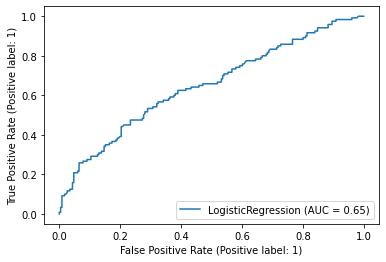

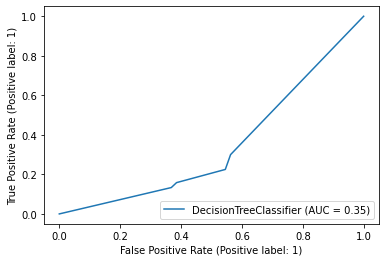

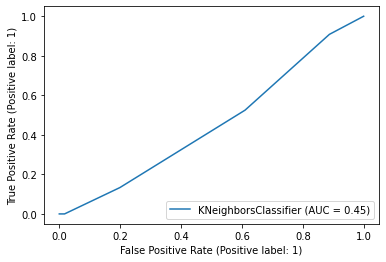

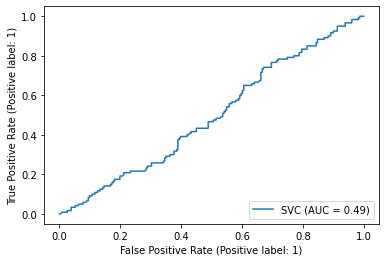

In [12]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

       Accuracy        F1    Recall
train  0.672363  0.027972  0.014184
test   0.655172  0.000000  0.000000
       Accuracy        F1    Recall
train  0.781968  0.538653  0.382979
test   0.551724  0.000000  0.000000
       Accuracy        F1    Recall
train  0.698291  0.350254  0.244681
test   0.568966  0.074074  0.052632
       Accuracy   F1  Recall
train  0.667649  0.0     0.0
test   0.672414  0.0     0.0
       Accuracy        F1    Recall
train  0.704773  0.262150  0.157801
test   0.620690  0.083333  0.052632


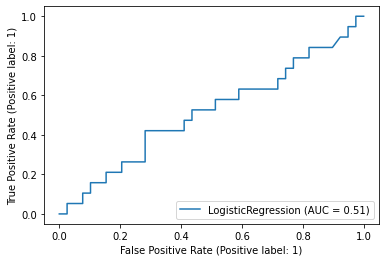

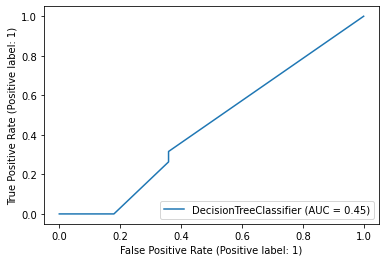

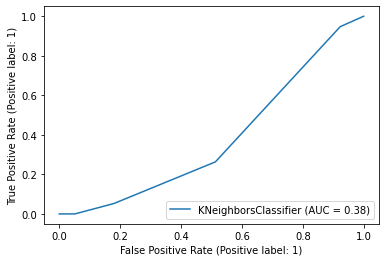

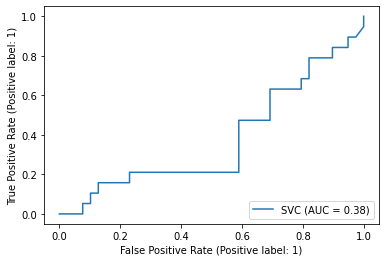

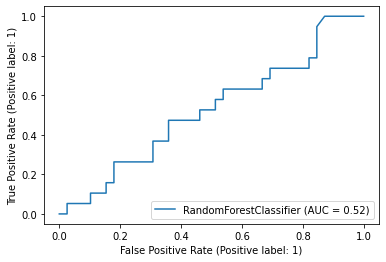

In [13]:
# Kroswalidacja stratyfikowana
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

In [14]:
# K-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_copya['Attrition_Yes']
X = df_copya.drop(['Attrition_Yes','Attrition_No'], axis=1)
for train, test in kf.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0
       Accuracy        F1    Recall
train  0.791966  0.560203  0.398917
test   0.425287  0.166667  0.172414
       Accuracy        F1    Recall
train  0.693046  0.351899  0.250903
test   0.563218  0.050000  0.034483
       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0


In [15]:
df_copyb = df[["Age", 'JobLevel', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'Attrition']]
df_copyb = pd.get_dummies(df_copyb, columns = ['OverTime', 'Attrition'])
df_copyb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1755 non-null   float64
 1   JobLevel          1755 non-null   float64
 2   MonthlyIncome     1755 non-null   float64
 3   StockOptionLevel  1755 non-null   float64
 4   OverTime_No       1755 non-null   uint8  
 5   OverTime_Yes      1755 non-null   uint8  
 6   Attrition_No      1755 non-null   uint8  
 7   Attrition_Yes     1755 non-null   uint8  
dtypes: float64(4), uint8(4)
memory usage: 61.8 KB


In [16]:
# Utworzenie zbioru testowego i treningowego
y = df_copyb['Attrition_Yes'].values
df_copy1=df_copyb.drop(['Attrition_Yes','Attrition_No'], axis=1)
X = df_copy1.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

       Accuracy   F1  Recall
train  0.670228  0.0     0.0
test   0.658120  0.0     0.0
       Accuracy        F1    Recall
train  0.818376  0.648276  0.507559
test   0.450142  0.171674  0.166667
       Accuracy        F1    Recall
train  0.688034  0.352071  0.257019
test   0.572650  0.175824  0.133333
       Accuracy   F1  Recall
train  0.670228  0.0     0.0
test   0.658120  0.0     0.0


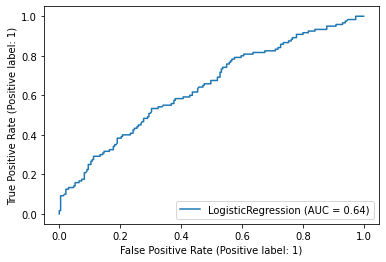

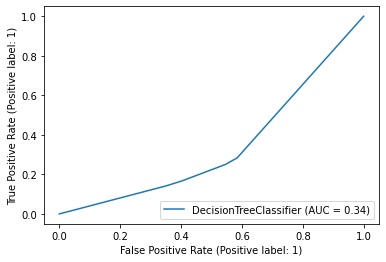

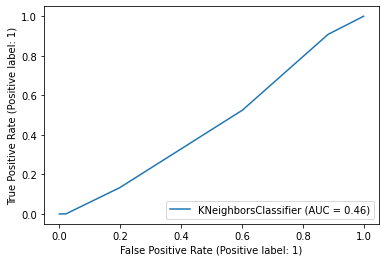

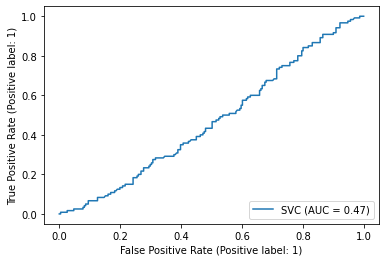

In [17]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

       Accuracy       F1    Recall
train  0.668238  0.00354  0.001773
test   0.672414  0.00000  0.000000
       Accuracy        F1   Recall
train  0.782557  0.547239  0.39539
test   0.482759  0.000000  0.00000
       Accuracy        F1    Recall
train  0.696523  0.348925  0.244681
test   0.568966  0.074074  0.052632
       Accuracy   F1  Recall
train  0.667649  0.0     0.0
test   0.672414  0.0     0.0
       Accuracy        F1    Recall
train  0.705952  0.290185  0.180851
test   0.620690  0.083333  0.052632


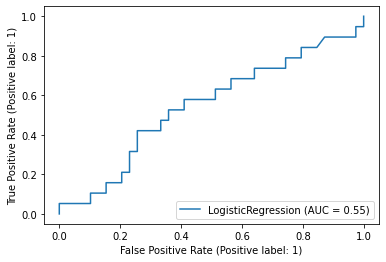

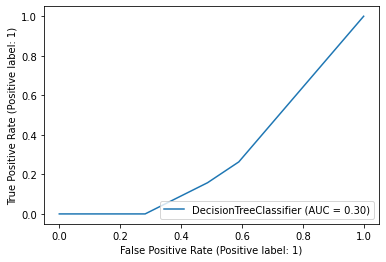

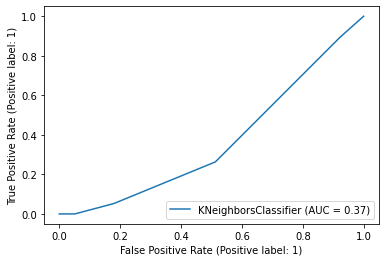

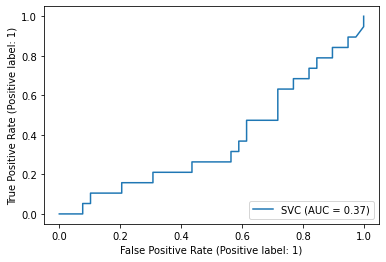

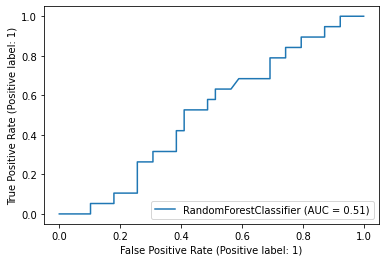

In [18]:
# Kroswalidacja stratyfikowana
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

In [19]:
# K-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_copyb['Attrition_Yes']
X = df_copyb.drop(['Attrition_Yes','Attrition_No'], axis=1)
for train, test in kf.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0
       Accuracy        F1    Recall
train  0.792566  0.583133  0.436823
test   0.390805  0.131148  0.137931
       Accuracy       F1    Recall
train  0.691847  0.35589  0.256318
test   0.563218  0.05000  0.034483
       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0


In [20]:
df_copyc = df[['JobLevel', 'OverTime', 'StockOptionLevel', 'Attrition']]
df_copyc = pd.get_dummies(df_copyc, columns = ['OverTime', 'Attrition'])
df_copyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JobLevel          1755 non-null   float64
 1   StockOptionLevel  1755 non-null   float64
 2   OverTime_No       1755 non-null   uint8  
 3   OverTime_Yes      1755 non-null   uint8  
 4   Attrition_No      1755 non-null   uint8  
 5   Attrition_Yes     1755 non-null   uint8  
dtypes: float64(2), uint8(4)
memory usage: 34.4 KB


In [21]:
# Utworzenie zbioru testowego i treningowego
y = df_copyc['Attrition_Yes'].values
df_copy1=df_copyc.drop(['Attrition_Yes','Attrition_No'], axis=1)
X = df_copy1.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

       Accuracy   F1  Recall
train  0.670228  0.0     0.0
test   0.658120  0.0     0.0
       Accuracy       F1   Recall
train  0.682336  0.20922  0.12743
test   0.678063  0.20979  0.12500
       Accuracy        F1    Recall
train  0.618234  0.344743  0.304536
test   0.589744  0.314286  0.275000
       Accuracy   F1  Recall
train  0.670228  0.0     0.0
test   0.658120  0.0     0.0


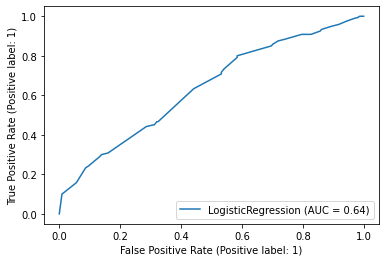

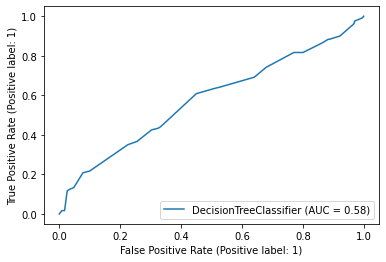

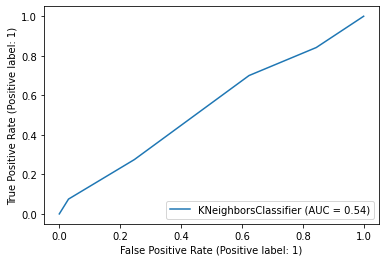

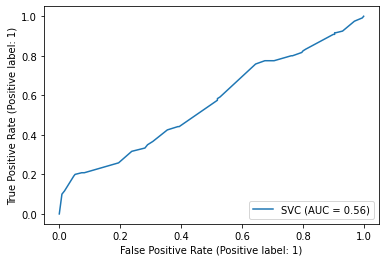

In [22]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

       Accuracy   F1  Recall
train  0.667649  0.0     0.0
test   0.672414  0.0     0.0
       Accuracy        F1    Recall
train  0.682970  0.206490  0.124113
test   0.655172  0.090909  0.052632
       Accuracy        F1    Recall
train  0.680024  0.176024  0.102837
test   0.655172  0.090909  0.052632
       Accuracy        F1    Recall
train  0.678845  0.226950  0.141844
test   0.637931  0.086957  0.052632
       Accuracy        F1    Recall
train  0.682970  0.206490  0.124113
test   0.655172  0.090909  0.052632


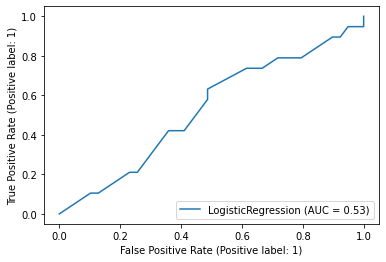

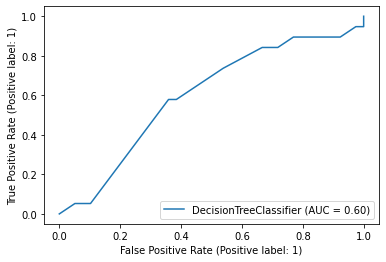

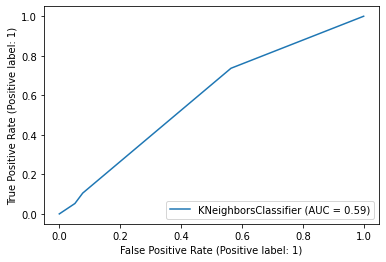

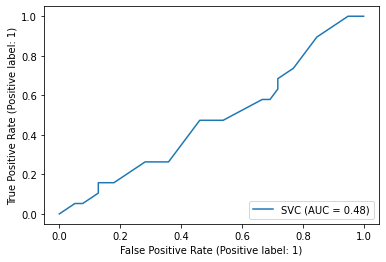

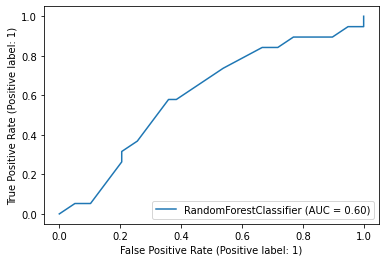

In [23]:
# Kroswalidacja stratyfikowana
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

In [24]:
# K-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_copyc['Attrition_Yes']
X = df_copyc.drop(['Attrition_Yes','Attrition_No'], axis=1)
for train, test in kf.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))

       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0
       Accuracy        F1    Recall
train  0.681055  0.166144  0.095668
test   0.689655  0.181818  0.103448
       Accuracy        F1    Recall
train  0.669664  0.045061  0.023466
test   0.666667  0.000000  0.000000
       Accuracy        F1    Recall
train  0.677458  0.222543  0.138989
test   0.678161  0.222222  0.137931
       Accuracy        F1    Recall
train  0.681055  0.166144  0.095668
test   0.689655  0.181818  0.103448


UNDER-SAMPLING

In [25]:
shuffled_df = df_copy.sample(frac=1,random_state=4)
attri_df = shuffled_df.loc[shuffled_df['Attrition_Yes'] == 1]
no_attri_df = shuffled_df.loc[shuffled_df['Attrition_Yes'] == 0].sample(n=583,random_state=42)
normalized_df = pd.concat([attri_df, no_attri_df])

In [26]:
# Utworzenie zbioru testowego i treningowego
y = normalized_df['Attrition_Yes'].values
df_copy1=normalized_df.drop(['Attrition_Yes','Attrition_No'], axis=1)
X = df_copy1.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

       Accuracy        F1    Recall
train  0.571888  0.586528  0.593291
test   0.576923  0.563877  0.603774
       Accuracy        F1    Recall
train   0.86588  0.852768  0.758910
test    0.41453  0.344498  0.339623
       Accuracy        F1    Recall
train  0.643777  0.654886  0.660377
test   0.465812  0.429224  0.443396
       Accuracy        F1    Recall
train  0.531116  0.510638  0.477987
test   0.568376  0.516746  0.509434
       Accuracy        F1   Recall
train  0.782189  0.774194  0.72956
test   0.491453  0.446512  0.45283


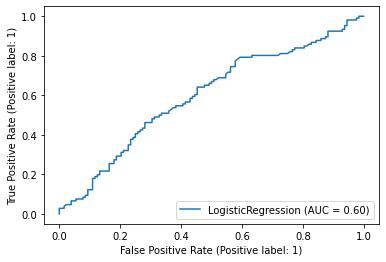

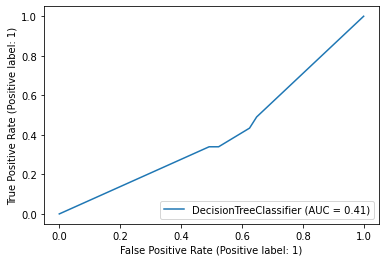

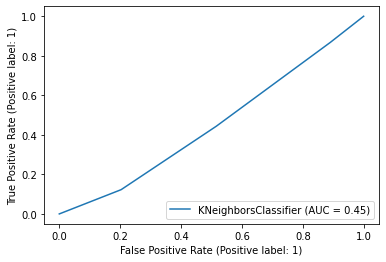

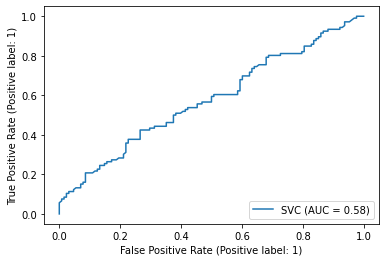

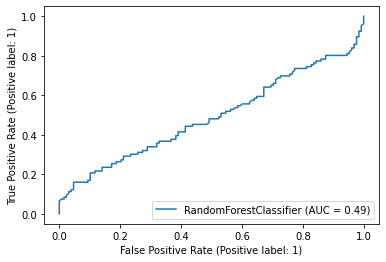

In [27]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

       Accuracy        F1    Recall
train  0.572695  0.561020  0.546099
test   0.657895  0.666667  0.684211
       Accuracy        F1    Recall
train  0.835106  0.807054  0.689716
test   0.421053  0.450000  0.473684
       Accuracy        F1    Recall
train  0.640957  0.661088  0.700355
test   0.552632  0.564103  0.578947
       Accuracy        F1    Recall
train  0.544326  0.484970  0.429078
test   0.421053  0.352941  0.315789
       Accuracy        F1    Recall
train   0.72695  0.694444  0.620567
test    0.50000  0.457143  0.421053


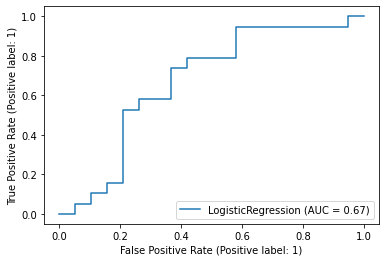

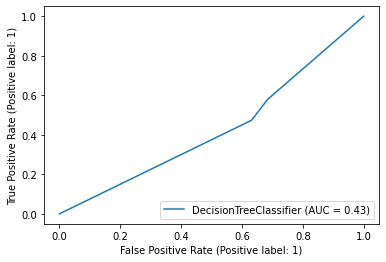

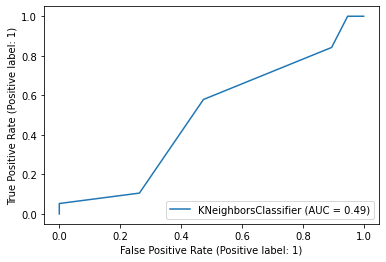

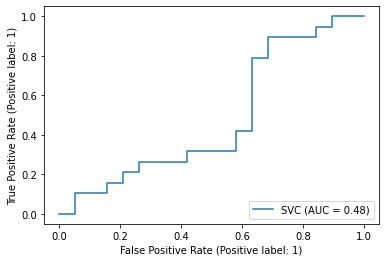

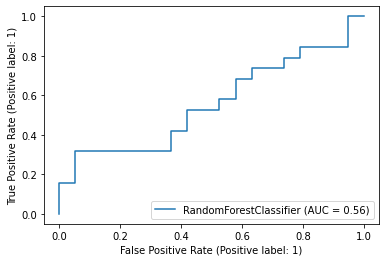

In [28]:
# Kroswalidacja stratyfikowana
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

In [29]:
# K-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_copy['Attrition_Yes']
X = df_copy.drop(['Attrition_Yes','Attrition_No'], axis=1)
for train, test in kf.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))

       Accuracy        F1    Recall
train  0.671463  0.061644  0.032491
test   0.689655  0.129032  0.068966
       Accuracy        F1    Recall
train  0.793765  0.567839  0.407942
test   0.436782  0.109091  0.103448
       Accuracy        F1    Recall
train  0.693645  0.324967  0.222022
test   0.540230  0.047619  0.034483
       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0
       Accuracy        F1    Recall
train  0.709832  0.250774  0.146209
test   0.643678  0.114286  0.068966


In [30]:
shuffled_df = df_copya.sample(frac=1,random_state=4)
attri1_df = shuffled_df.loc[shuffled_df['Attrition_Yes'] == 1]
no_attri1_df = shuffled_df.loc[shuffled_df['Attrition_Yes'] == 0].sample(n=583,random_state=42)
normalized1_df = pd.concat([attri1_df, no_attri1_df])

In [31]:
# Utworzenie zbioru testowego i treningowego
y = normalized1_df['Attrition_Yes'].values
df_copy1=normalized1_df.drop(['Attrition_Yes','Attrition_No'], axis=1)
X = df_copy1.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

       Accuracy        F1    Recall
train  0.574034  0.557414  0.524109
test   0.555556  0.527273  0.547170
       Accuracy        F1    Recall
train  0.858369  0.845433  0.756813
test   0.380342  0.355556  0.377358
       Accuracy        F1    Recall
train  0.648069  0.654737  0.651992
test   0.470085  0.431193  0.443396
       Accuracy        F1    Recall
train  0.536481  0.513514  0.477987
test   0.564103  0.509615  0.500000
       Accuracy        F1    Recall
train  0.756438  0.747497  0.704403
test   0.487179  0.439252  0.443396


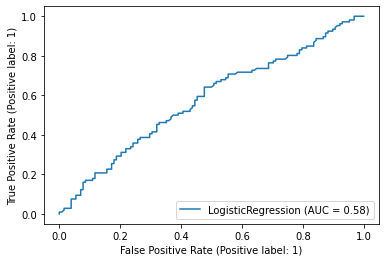

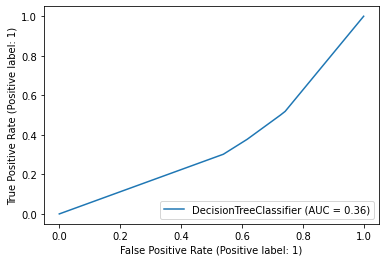

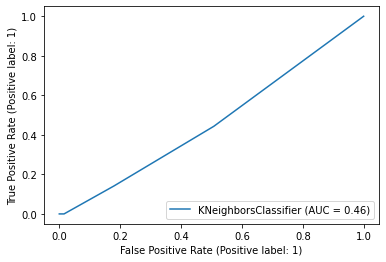

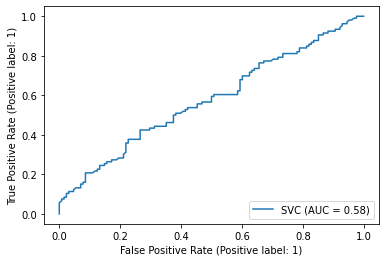

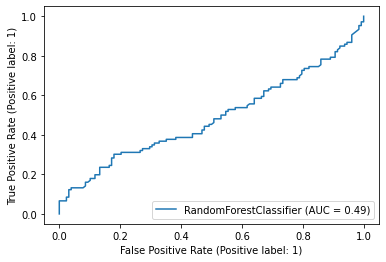

In [32]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

       Accuracy        F1    Recall
train  0.581560  0.545279  0.501773
test   0.710526  0.744186  0.842105
       Accuracy        F1    Recall
train  0.832447  0.804550  0.689716
test   0.315789  0.133333  0.105263
       Accuracy        F1    Recall
train  0.640957  0.643172  0.647163
test   0.552632  0.540541  0.526316
       Accuracy        F1    Recall
train  0.544326  0.481855  0.423759
test   0.421053  0.352941  0.315789
       Accuracy        F1    Recall
train  0.714539  0.676056  0.595745
test   0.526316  0.526316  0.526316


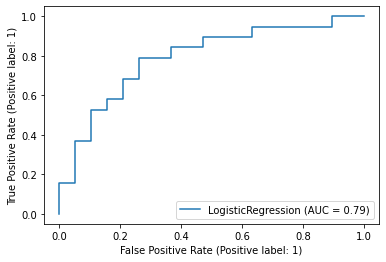

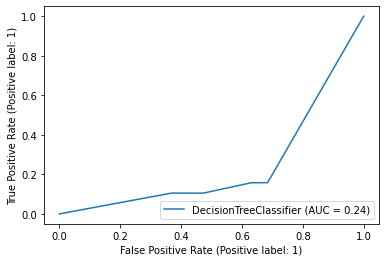

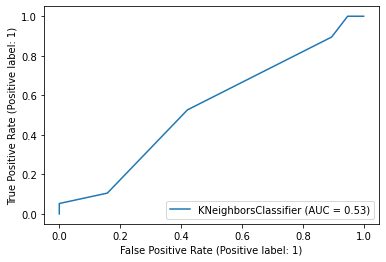

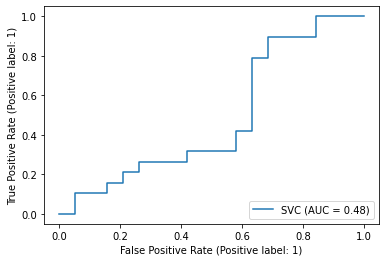

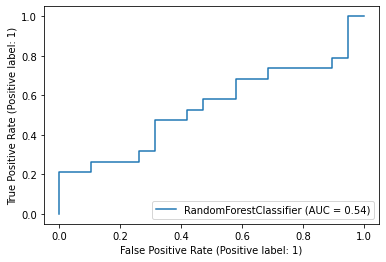

In [33]:
# Kroswalidacja stratyfikowana
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

In [34]:
# K-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_copya['Attrition_Yes']
X = df_copya.drop(['Attrition_Yes','Attrition_No'], axis=1)
for train, test in kf.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))

       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0
       Accuracy        F1    Recall
train  0.791367  0.559494  0.398917
test   0.425287  0.166667  0.172414
       Accuracy        F1    Recall
train  0.693046  0.351899  0.250903
test   0.563218  0.050000  0.034483
       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0
       Accuracy        F1    Recall
train  0.707434  0.275964  0.167870
test   0.666667  0.216216  0.137931


In [35]:
shuffled_df = df_copyb.sample(frac=1,random_state=4)
attri2_df = shuffled_df.loc[shuffled_df['Attrition_Yes'] == 1]
no_attri2_df = shuffled_df.loc[shuffled_df['Attrition_Yes'] == 0].sample(n=583,random_state=42)
normalized2_df = pd.concat([attri2_df, no_attri2_df])

In [36]:
# Utworzenie zbioru testowego i treningowego
y = normalized2_df['Attrition_Yes'].values
df_copy1=normalized2_df.drop(['Attrition_Yes','Attrition_No'], axis=1)
X = df_copy1.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

       Accuracy        F1    Recall
train  0.568670  0.590631  0.607966
test   0.568376  0.542986  0.566038
       Accuracy        F1    Recall
train  0.861588  0.850174  0.767296
test   0.388889  0.341014  0.349057
       Accuracy        F1    Recall
train  0.648069  0.654008  0.649895
test   0.470085  0.431193  0.443396
       Accuracy        F1    Recall
train  0.535408  0.507395  0.467505
test   0.564103  0.504854  0.490566
       Accuracy        F1    Recall
train  0.695279  0.696581  0.683438
test   0.538462  0.480769  0.471698


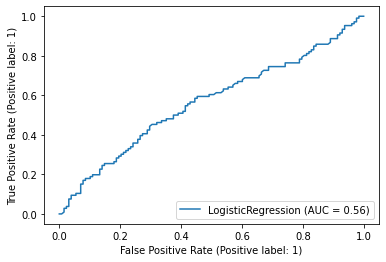

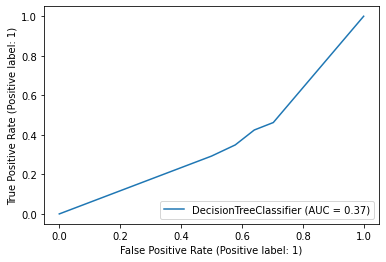

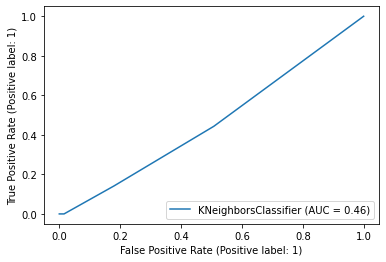

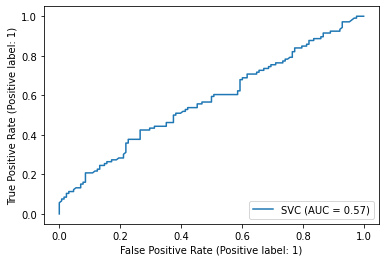

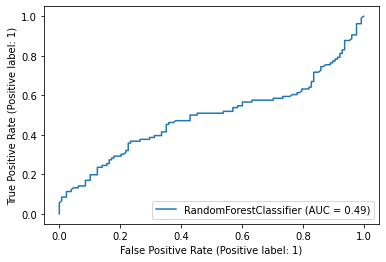

In [37]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

       Accuracy        F1    Recall
train  0.574468  0.535783  0.491135
test   0.605263  0.651163  0.736842
       Accuracy        F1    Recall
train  0.824468  0.802000  0.710993
test   0.394737  0.378378  0.368421
       Accuracy        F1    Recall
train  0.640957  0.642542  0.645390
test   0.526316  0.500000  0.473684
       Accuracy        F1    Recall
train  0.543440  0.478217  0.418440
test   0.421053  0.352941  0.315789
       Accuracy        F1    Recall
train  0.673759  0.632000  0.560284
test   0.500000  0.486486  0.473684


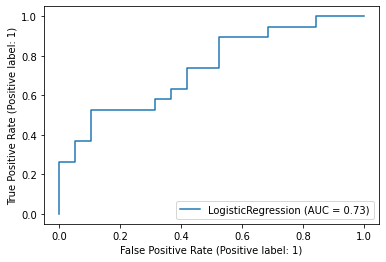

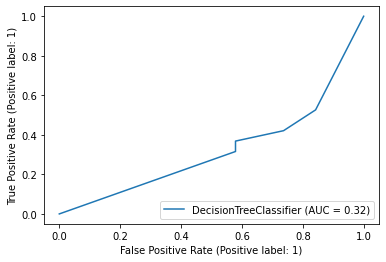

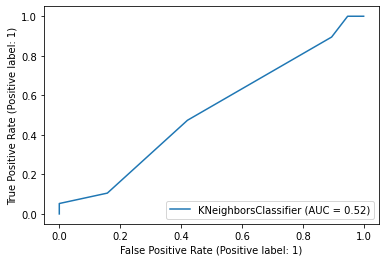

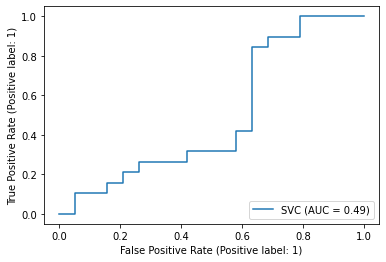

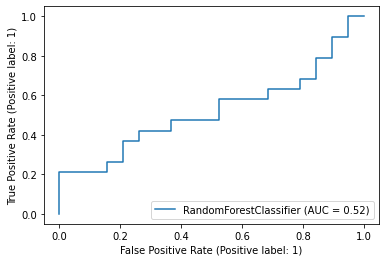

In [38]:
# Kroswalidacja stratyfikowana
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

In [39]:
# K-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_copyb['Attrition_Yes']
X = df_copyb.drop(['Attrition_Yes','Attrition_No'], axis=1)
for train, test in kf.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))

       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0
       Accuracy        F1    Recall
train  0.792566  0.583133  0.436823
test   0.390805  0.131148  0.137931
       Accuracy       F1    Recall
train  0.691847  0.35589  0.256318
test   0.563218  0.05000  0.034483
       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0
       Accuracy        F1    Recall
train  0.703837  0.262687  0.158845
test   0.666667  0.216216  0.137931


In [40]:
shuffled_df = df_copyc.sample(frac=1,random_state=4)
attri3_df = shuffled_df.loc[shuffled_df['Attrition_Yes'] == 1]
no_attri3_df = shuffled_df.loc[shuffled_df['Attrition_Yes'] == 0].sample(n=583,random_state=42)
normalized3_df = pd.concat([attri3_df, no_attri3_df])

In [41]:
# Utworzenie zbioru testowego i treningowego
y = normalized3_df['Attrition_Yes'].values
df_copy1=normalized3_df.drop(['Attrition_Yes','Attrition_No'], axis=1)
X = df_copy1.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

       Accuracy        F1    Recall
train  0.580472  0.595657  0.603774
test   0.581197  0.550459  0.566038
       Accuracy        F1    Recall
train  0.592275  0.621514  0.654088
test   0.512821  0.516949  0.575472
       Accuracy        F1    Recall
train  0.572961  0.624528  0.693920
test   0.525641  0.546939  0.632075
       Accuracy        F1    Recall
train  0.579399  0.604040  0.626834
test   0.572650  0.553571  0.584906
       Accuracy        F1    Recall
train  0.591202  0.634708  0.693920
test   0.508547  0.526749  0.603774


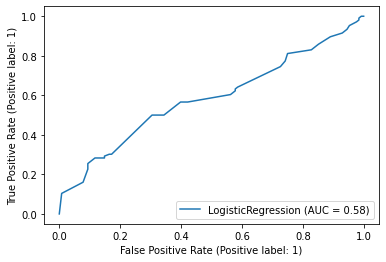

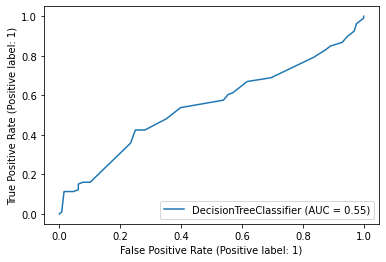

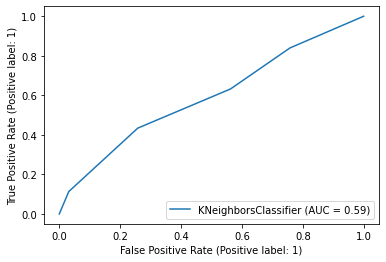

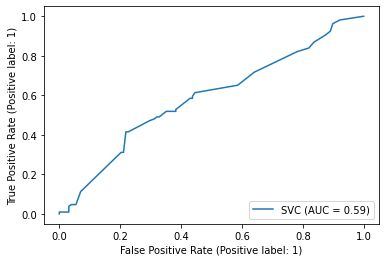

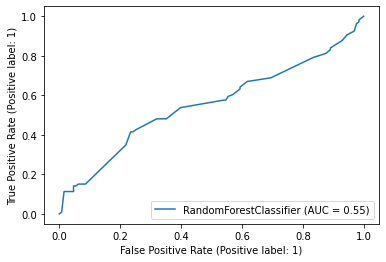

In [42]:
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=30)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

       Accuracy        F1    Recall
train  0.573582  0.569382  0.563830
test   0.578947  0.636364  0.736842
       Accuracy        F1    Recall
train  0.592199  0.543651  0.485816
test   0.552632  0.564103  0.578947
       Accuracy        F1    Recall
train  0.504433  0.662643  0.973404
test   0.447368  0.618182  0.894737
       Accuracy        F1    Recall
train  0.587766  0.554171  0.512411
test   0.552632  0.585366  0.631579
       Accuracy        F1    Recall
train  0.592199  0.570093  0.540780
test   0.526316  0.571429  0.631579


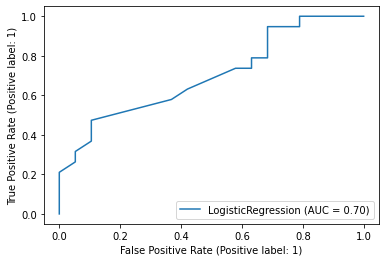

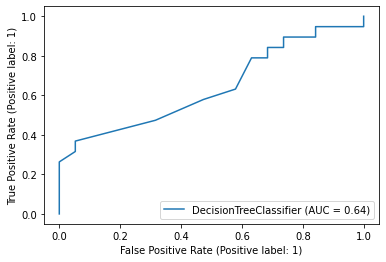

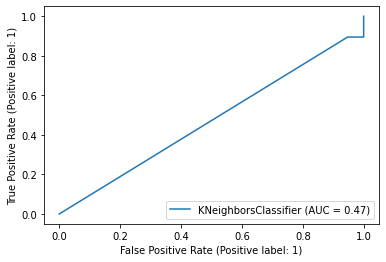

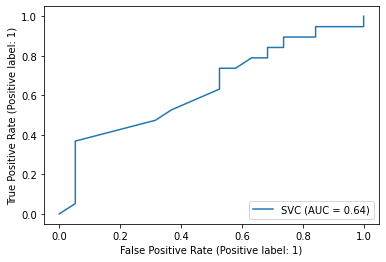

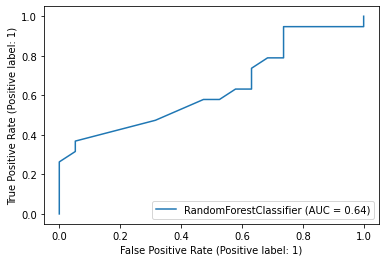

In [43]:
# Kroswalidacja stratyfikowana
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))
plot_roc_curve(lr, X_test, y_test)

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))
plot_roc_curve(clf, X_test, y_test)

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))
plot_roc_curve(knn, X_test, y_test)

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))
plot_roc_curve(svm, X_test, y_test)

# random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))
plot_roc_curve(rfc, X_test, y_test)

In [44]:
# K-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=20, shuffle=True, random_state=42)
y = df_copyc['Attrition_Yes']
X = df_copyc.drop(['Attrition_Yes','Attrition_No'], axis=1)
for train, test in kf.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

#regresja logistyczna
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=4)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))

       Accuracy   F1  Recall
train  0.667866  0.0     0.0
test   0.666667  0.0     0.0
       Accuracy        F1    Recall
train  0.681055  0.166144  0.095668
test   0.689655  0.181818  0.103448
       Accuracy        F1    Recall
train  0.669664  0.045061  0.023466
test   0.666667  0.000000  0.000000
       Accuracy        F1    Recall
train  0.677458  0.222543  0.138989
test   0.678161  0.222222  0.137931
       Accuracy        F1    Recall
train  0.681055  0.166144  0.095668
test   0.689655  0.181818  0.103448
